# HOUSING PRICES PREDICTION

### 1.0 Importing the libraries and Loading the Data

In [132]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from functions import DataVisualisation
from functions import OutliersDetector

%matplotlib inline
plt.style.use('ggplot')

In [109]:
data = pd.read_csv('housing.csv')
# Check the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [110]:
# Get a quick description of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Number of columns: 10
##### Number of numerical columns: 9
##### Number of categorical columns: 1
##### Number of rows: 20,640
##### Bedroom column has some missing values

In [111]:
# Get the summary of the numeriacal attributes
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [112]:
# Get the description of the categorical data
value_count = data['ocean_proximity'].value_counts()
percentage_counts = round(data['ocean_proximity'].value_counts() / len(data) * 100, 2)
print('Ocean_Proximity Attribute Value Count: ', value_count)
print('\n','Ocean_Proximity Attribute in percentage: ',percentage_counts)

Ocean_Proximity Attribute Value Count:  ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

 Ocean_Proximity Attribute in percentage:  ocean_proximity
<1H OCEAN     44.26
INLAND        31.74
NEAR OCEAN    12.88
NEAR BAY      11.09
ISLAND         0.02
Name: count, dtype: float64


## DATA PREPROCESSING
### 2.1 Data Cleaning

In [113]:
# Getting missing values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [114]:
# Checking for duplicates
data[data.duplicated()].shape[0]

0

##### There 207 missing values in the total_bedrooms' column and no duplicates of data in the dataset
#### 2.1.1 Dealing with the missing values 

In [115]:
# Filling the missing values with the median using the imputer instance
imputer = SimpleImputer(strategy='median')
# Creating a coppy of the data with numerical attributes
data_num = data.drop('ocean_proximity', axis=1)
# Fitting the imputer unstance to the data
imputer.fit(data_num)
# Transforming the data by replacing missing values with median
x = imputer.transform(data_num)
housing_data = pd.DataFrame(x, columns=data_num.columns, index=data_num.index)
# adding the dropped column
housing_data['ocean_proximity'] = data['ocean_proximity']
housing_data.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### 2.1.2 Dealing with potential outliers

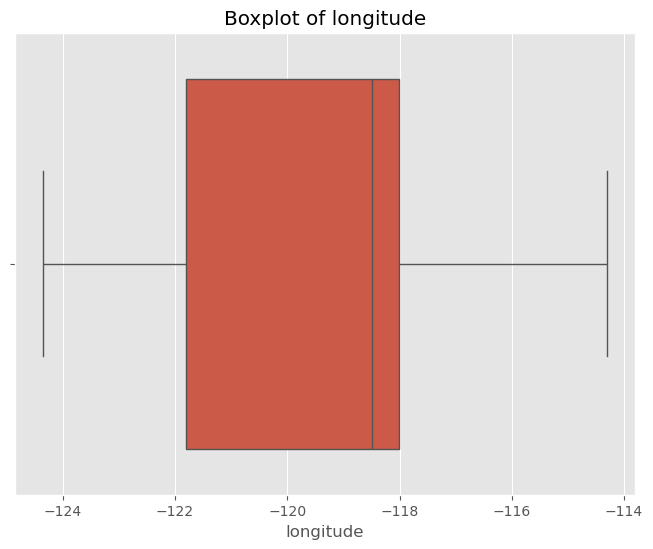

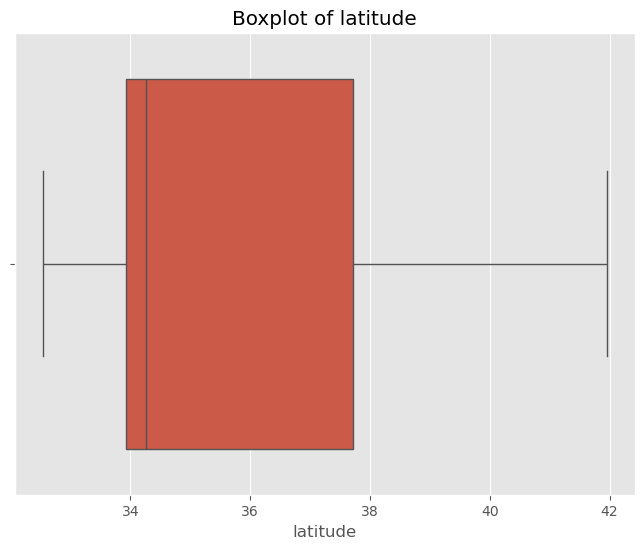

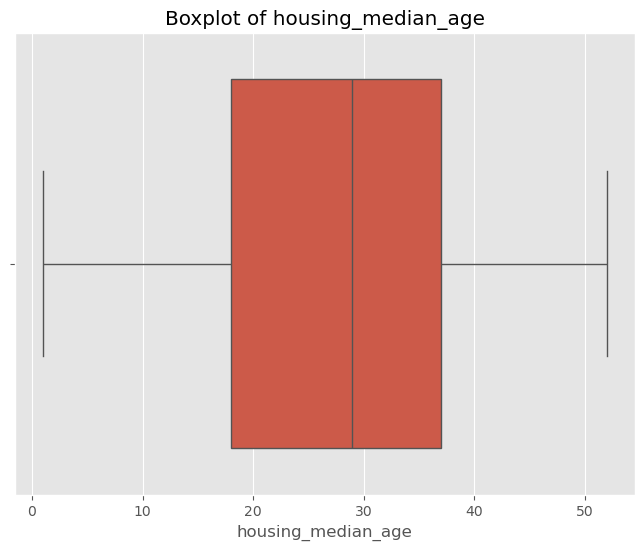

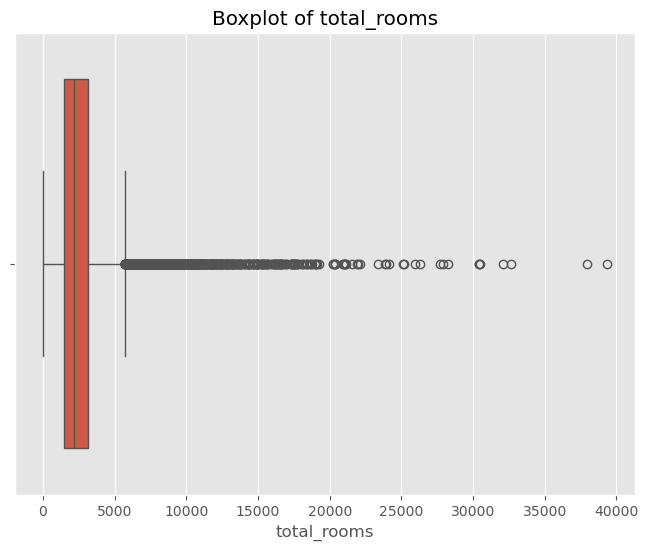

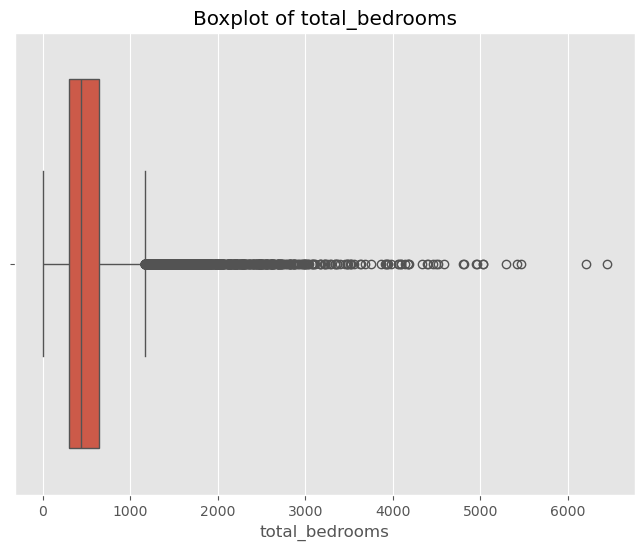

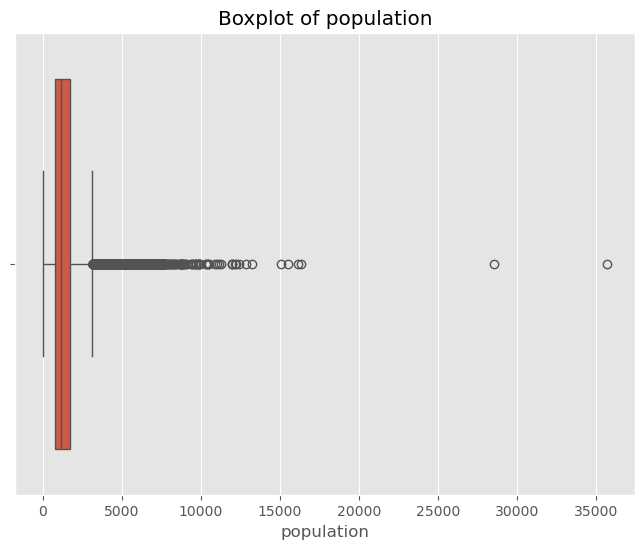

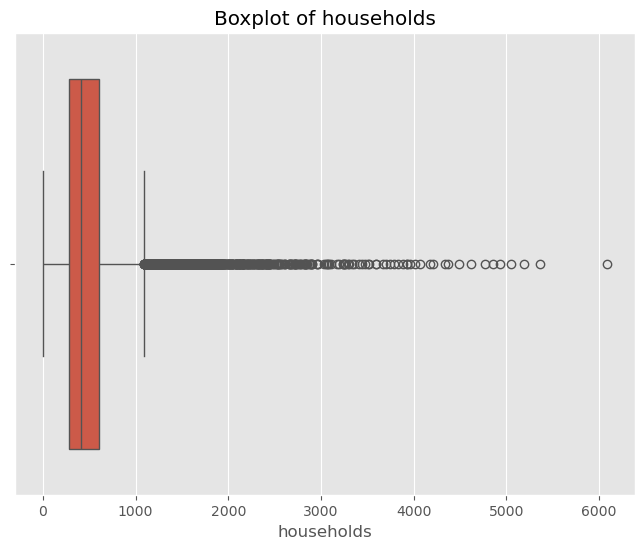

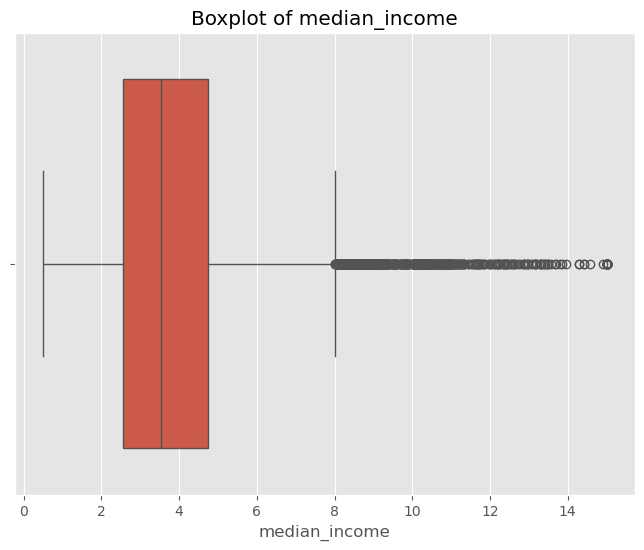

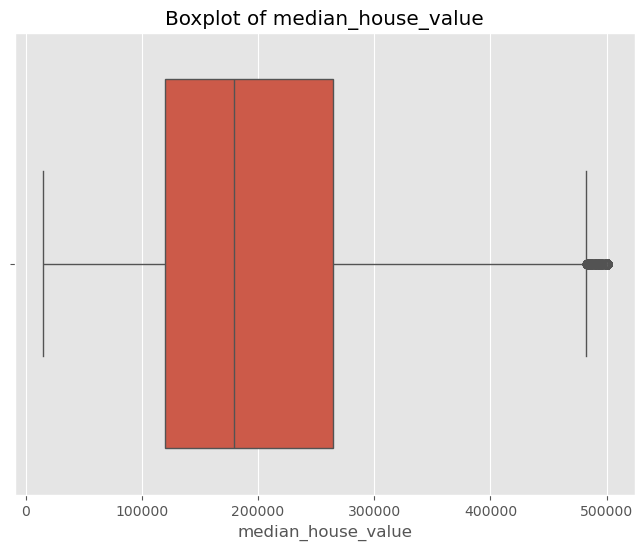

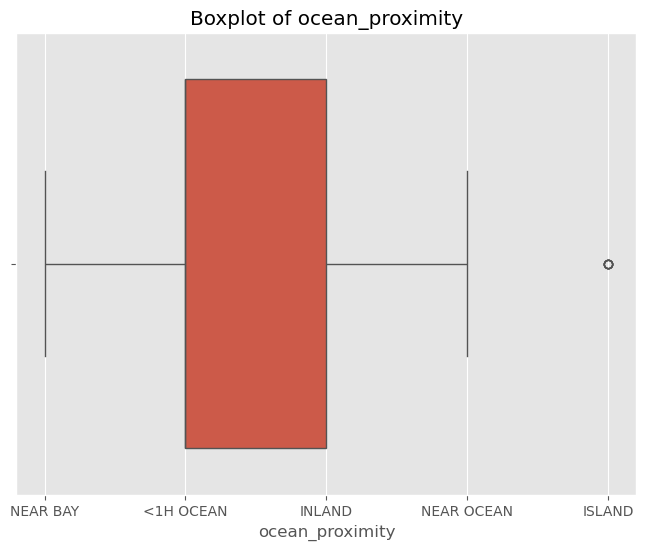

In [116]:
# Visualise the columns' boxplot to view potential outliers
# Creating an instance ot the DataVisualisation
data_visualiser = DataVisualisation(housing_data)
# Iterating through the columns
for column in housing_data.columns:
    data_visualiser.plot_boxplot(column)

### Univariate Visualisation
Visualising each attribute to gain more insight about them.

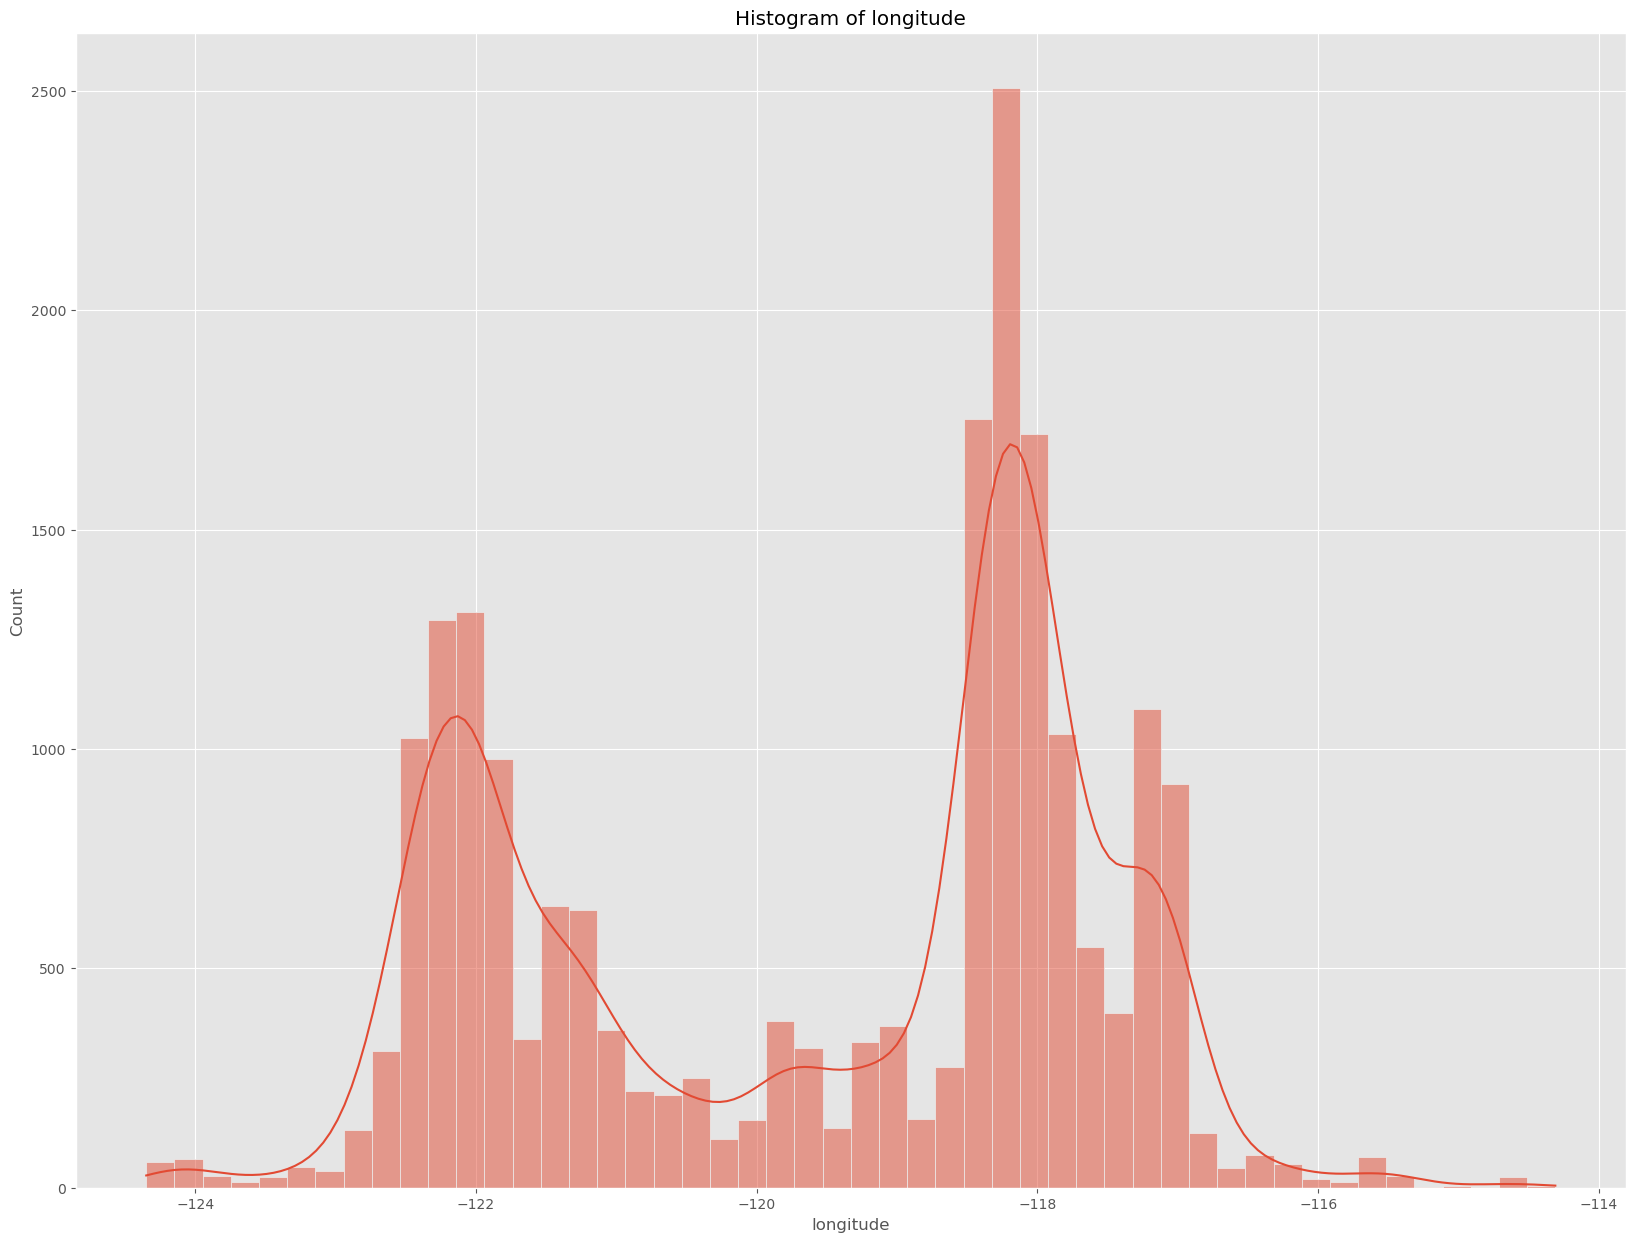

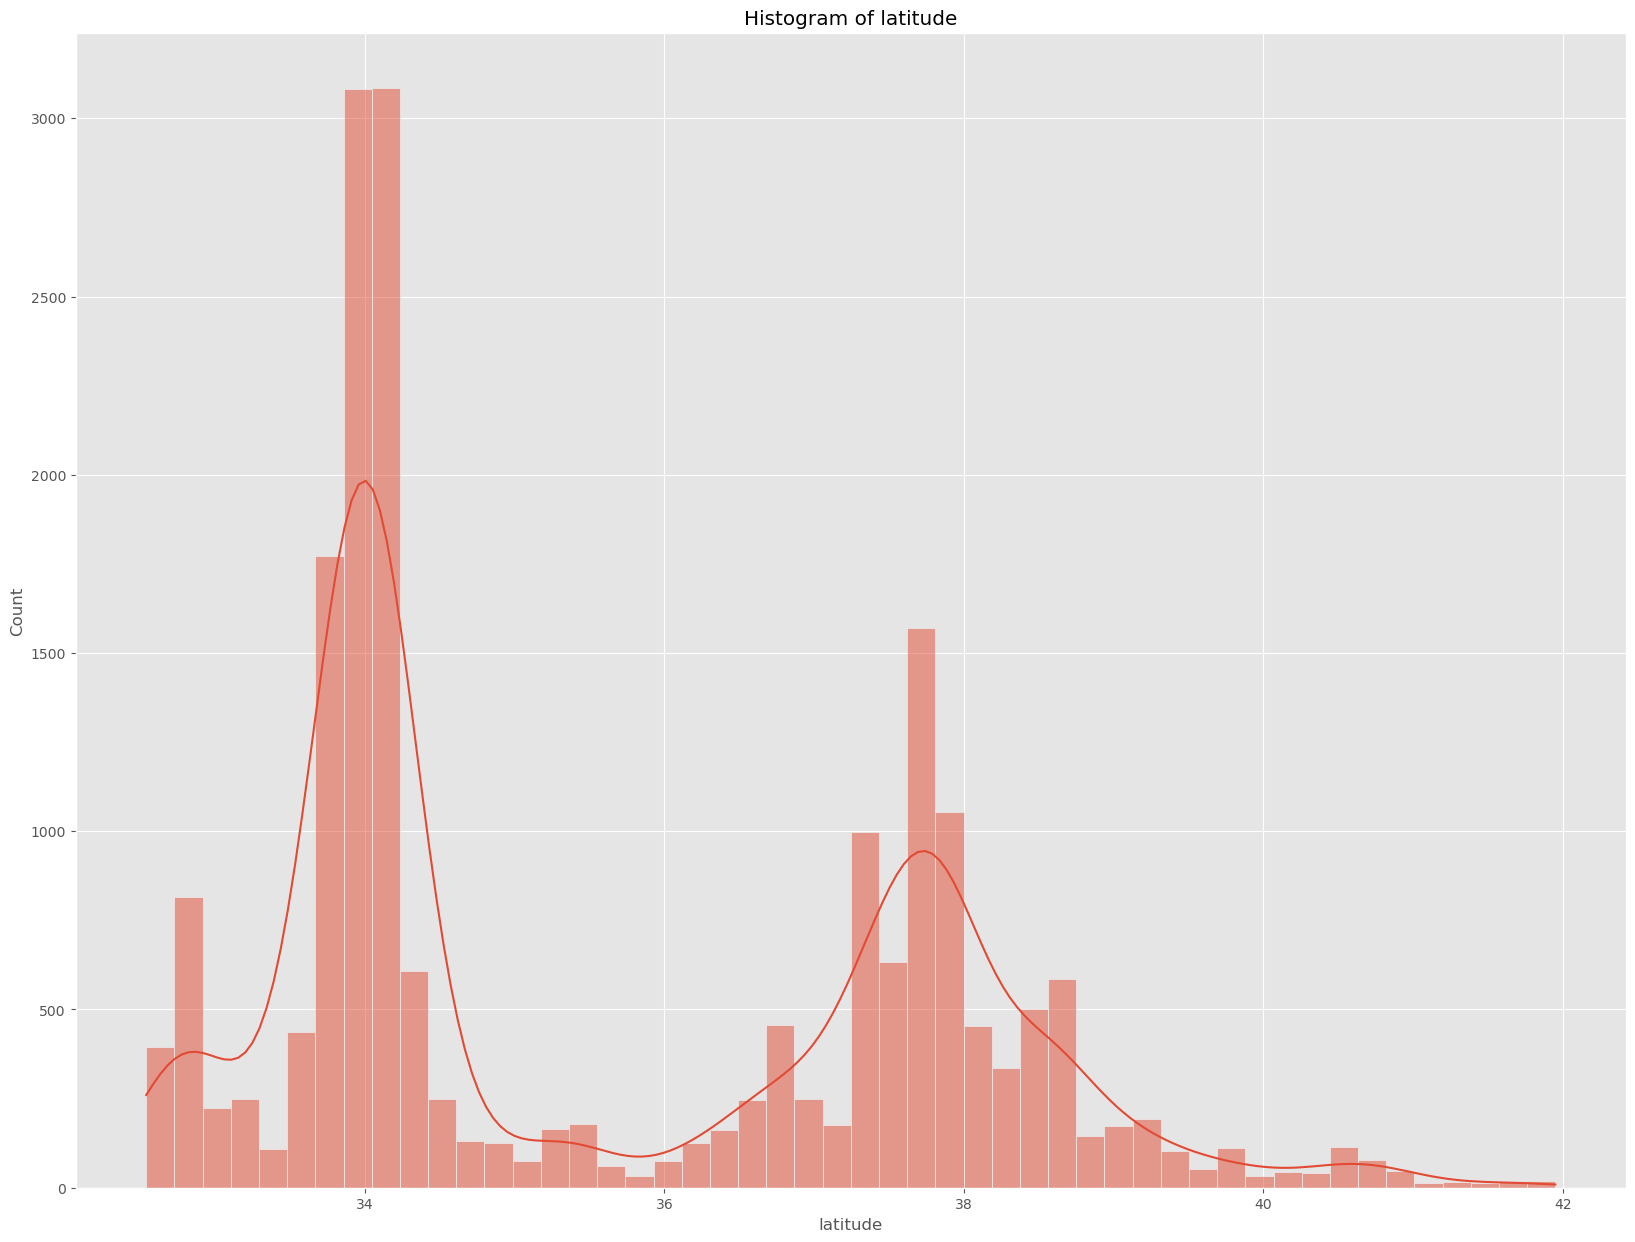

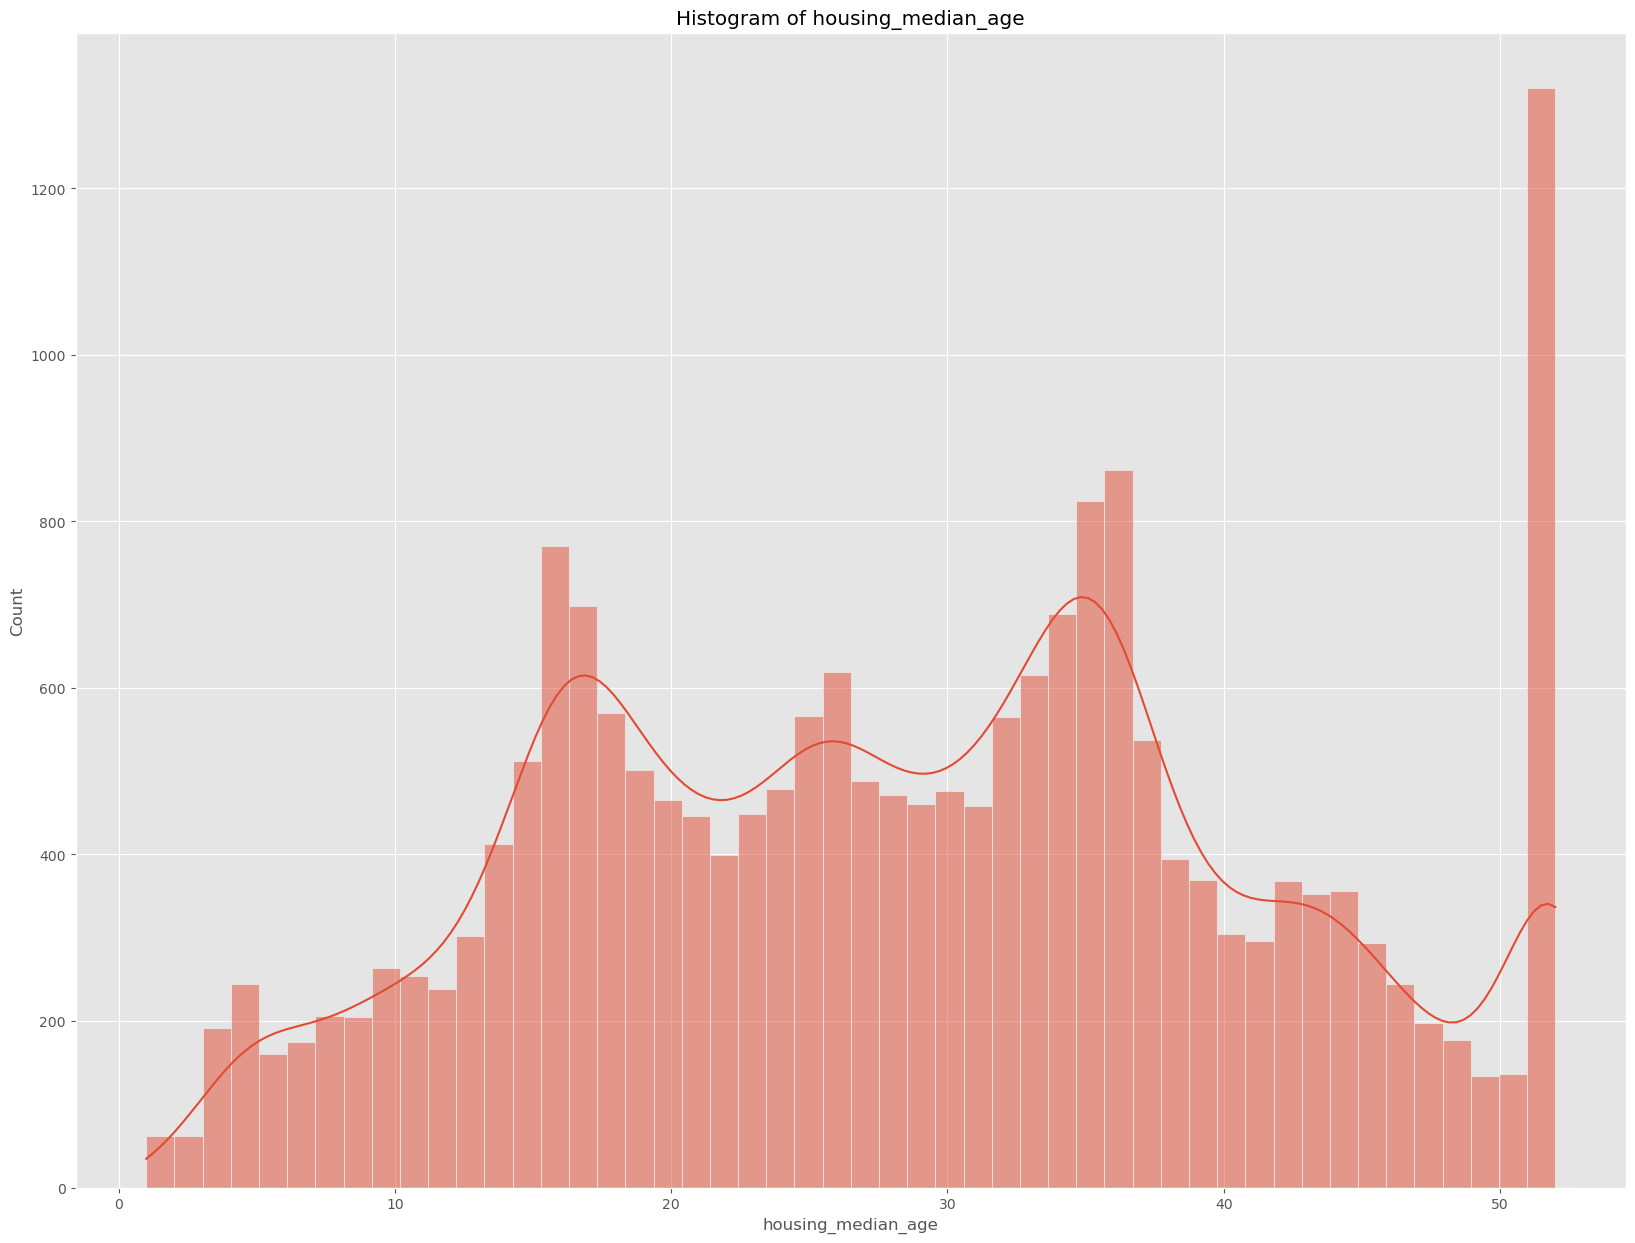

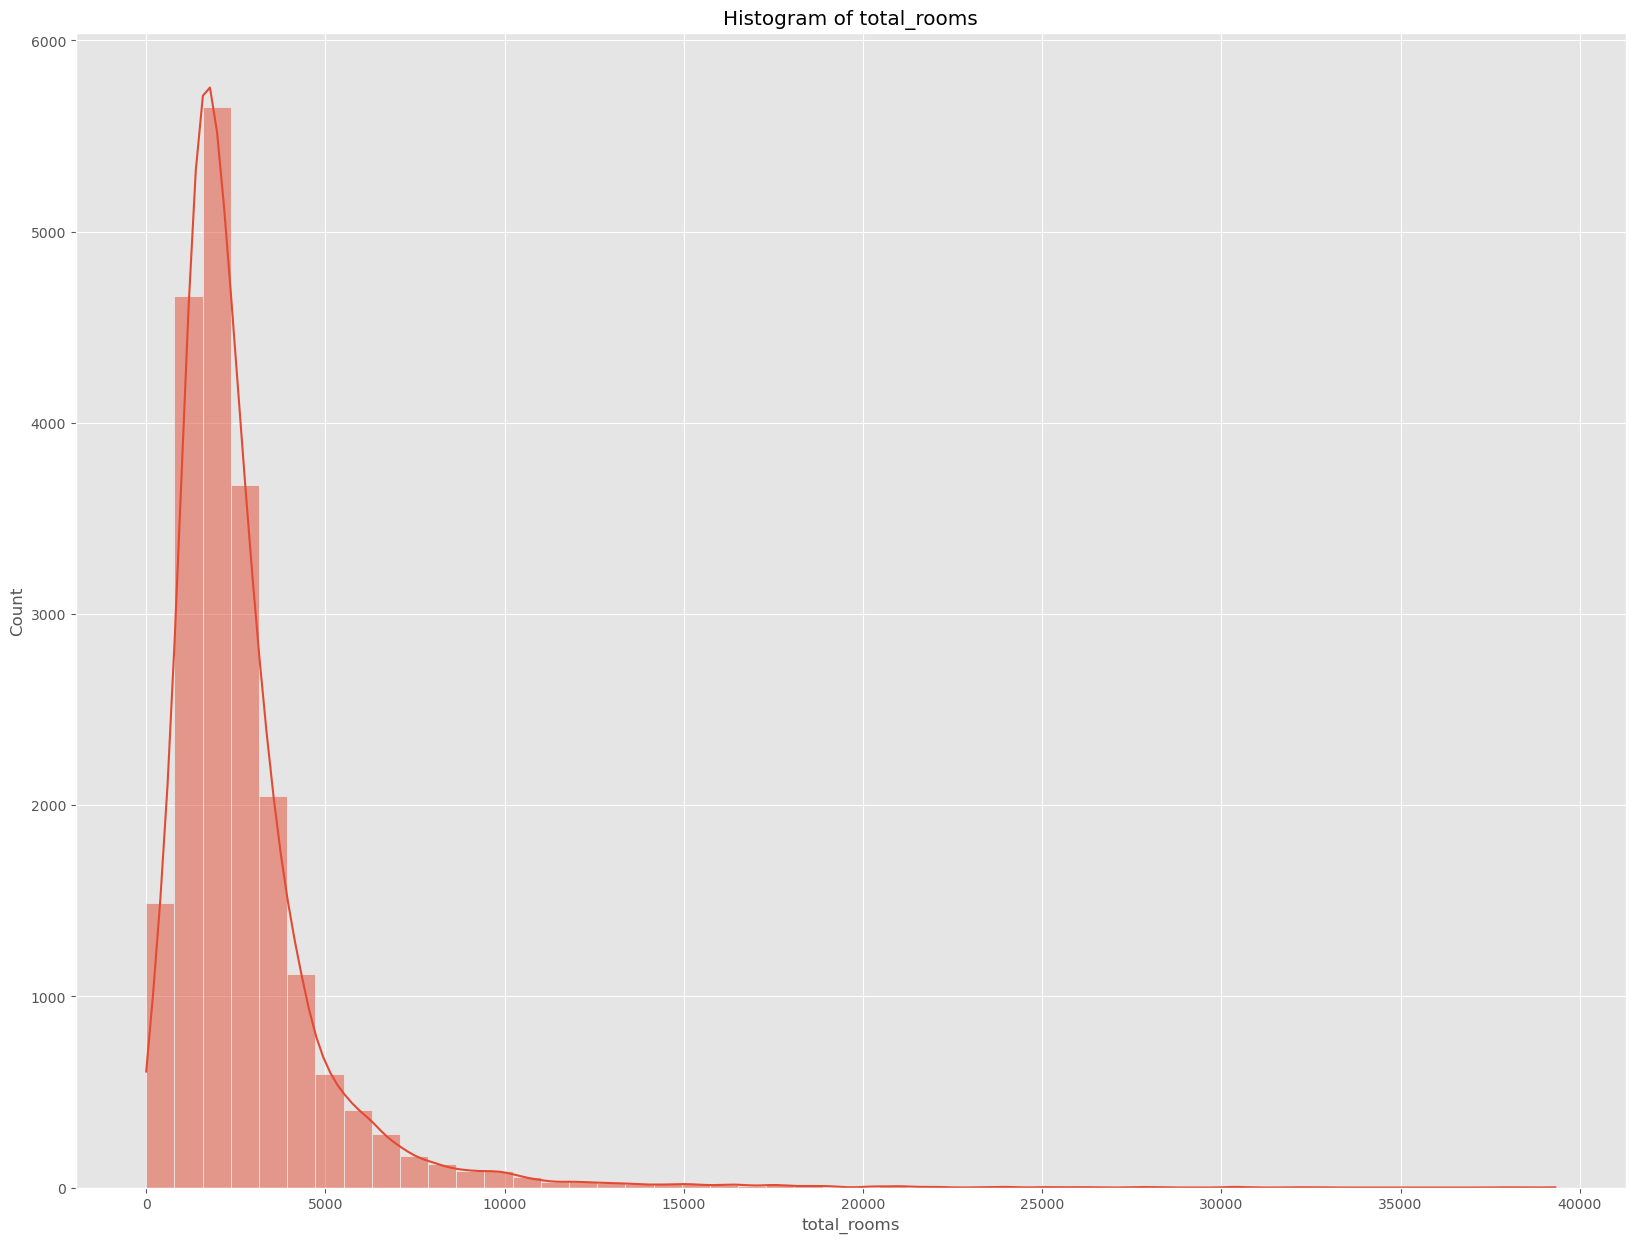

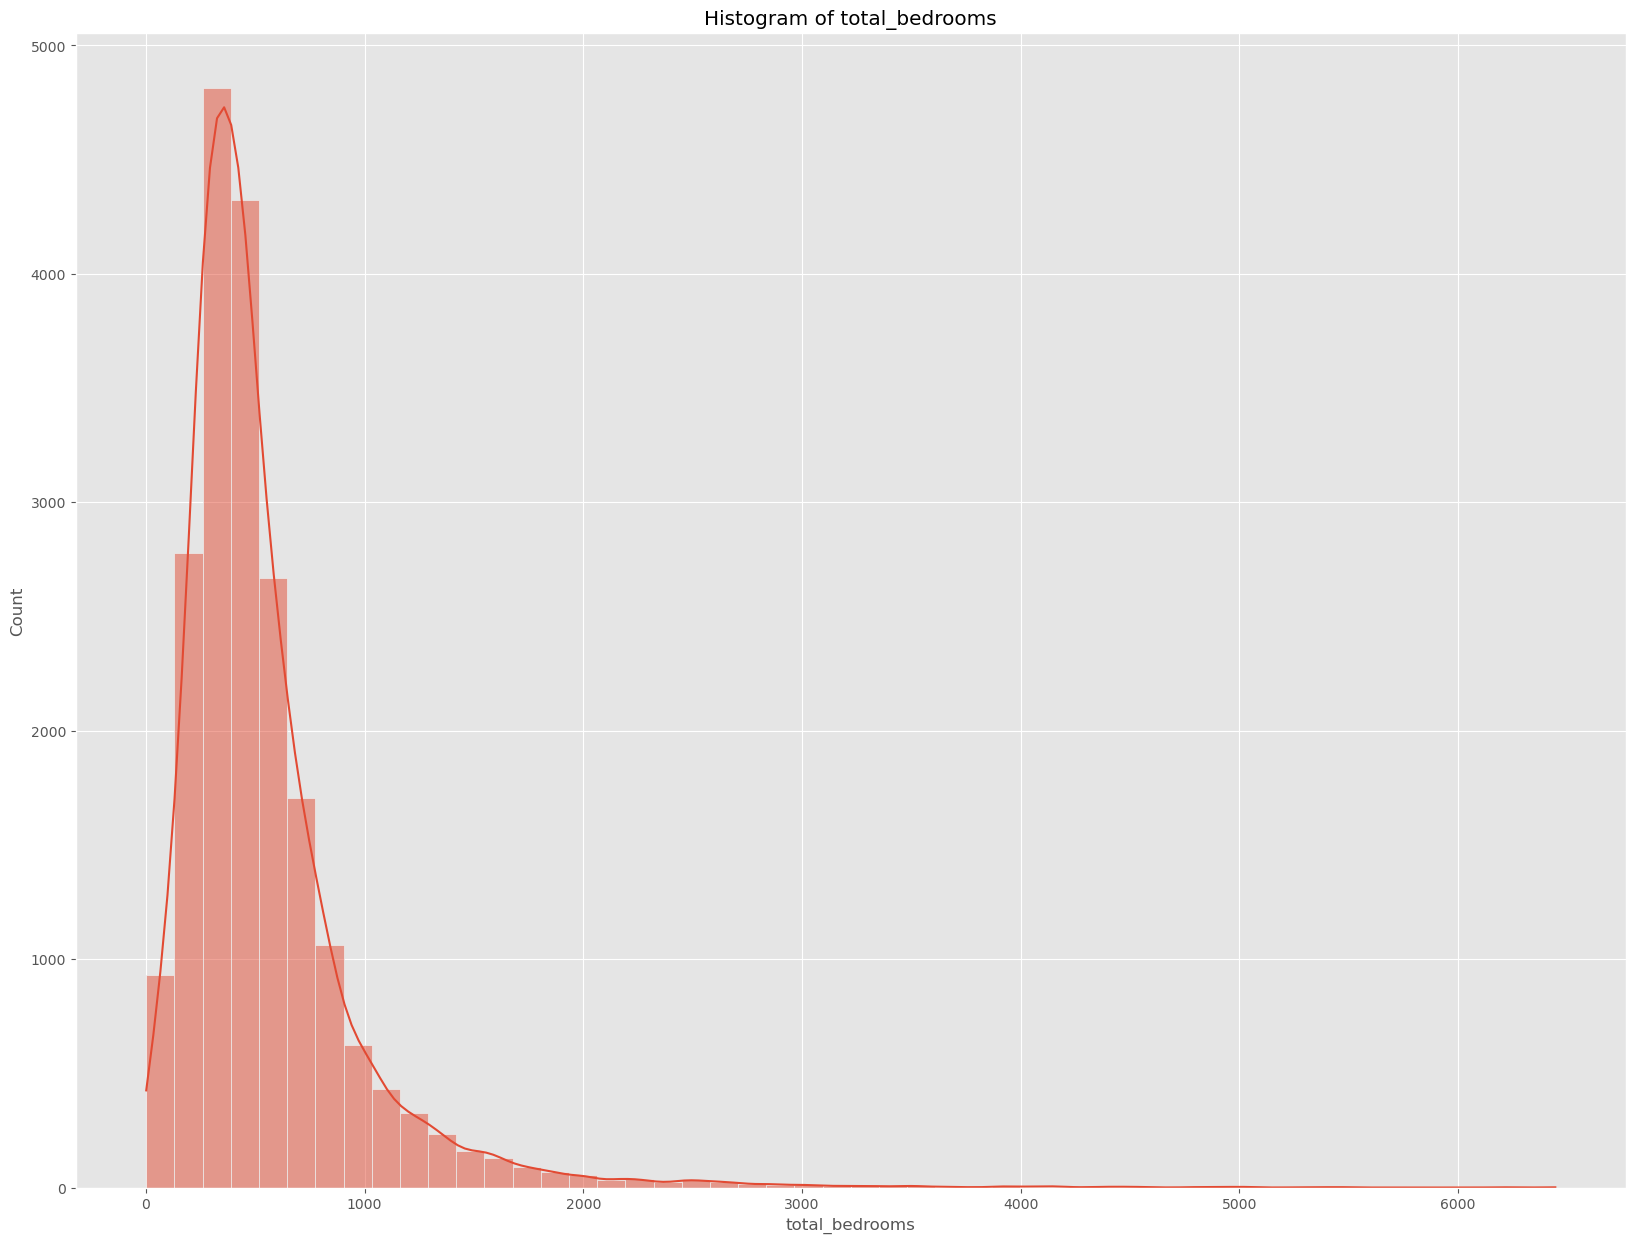

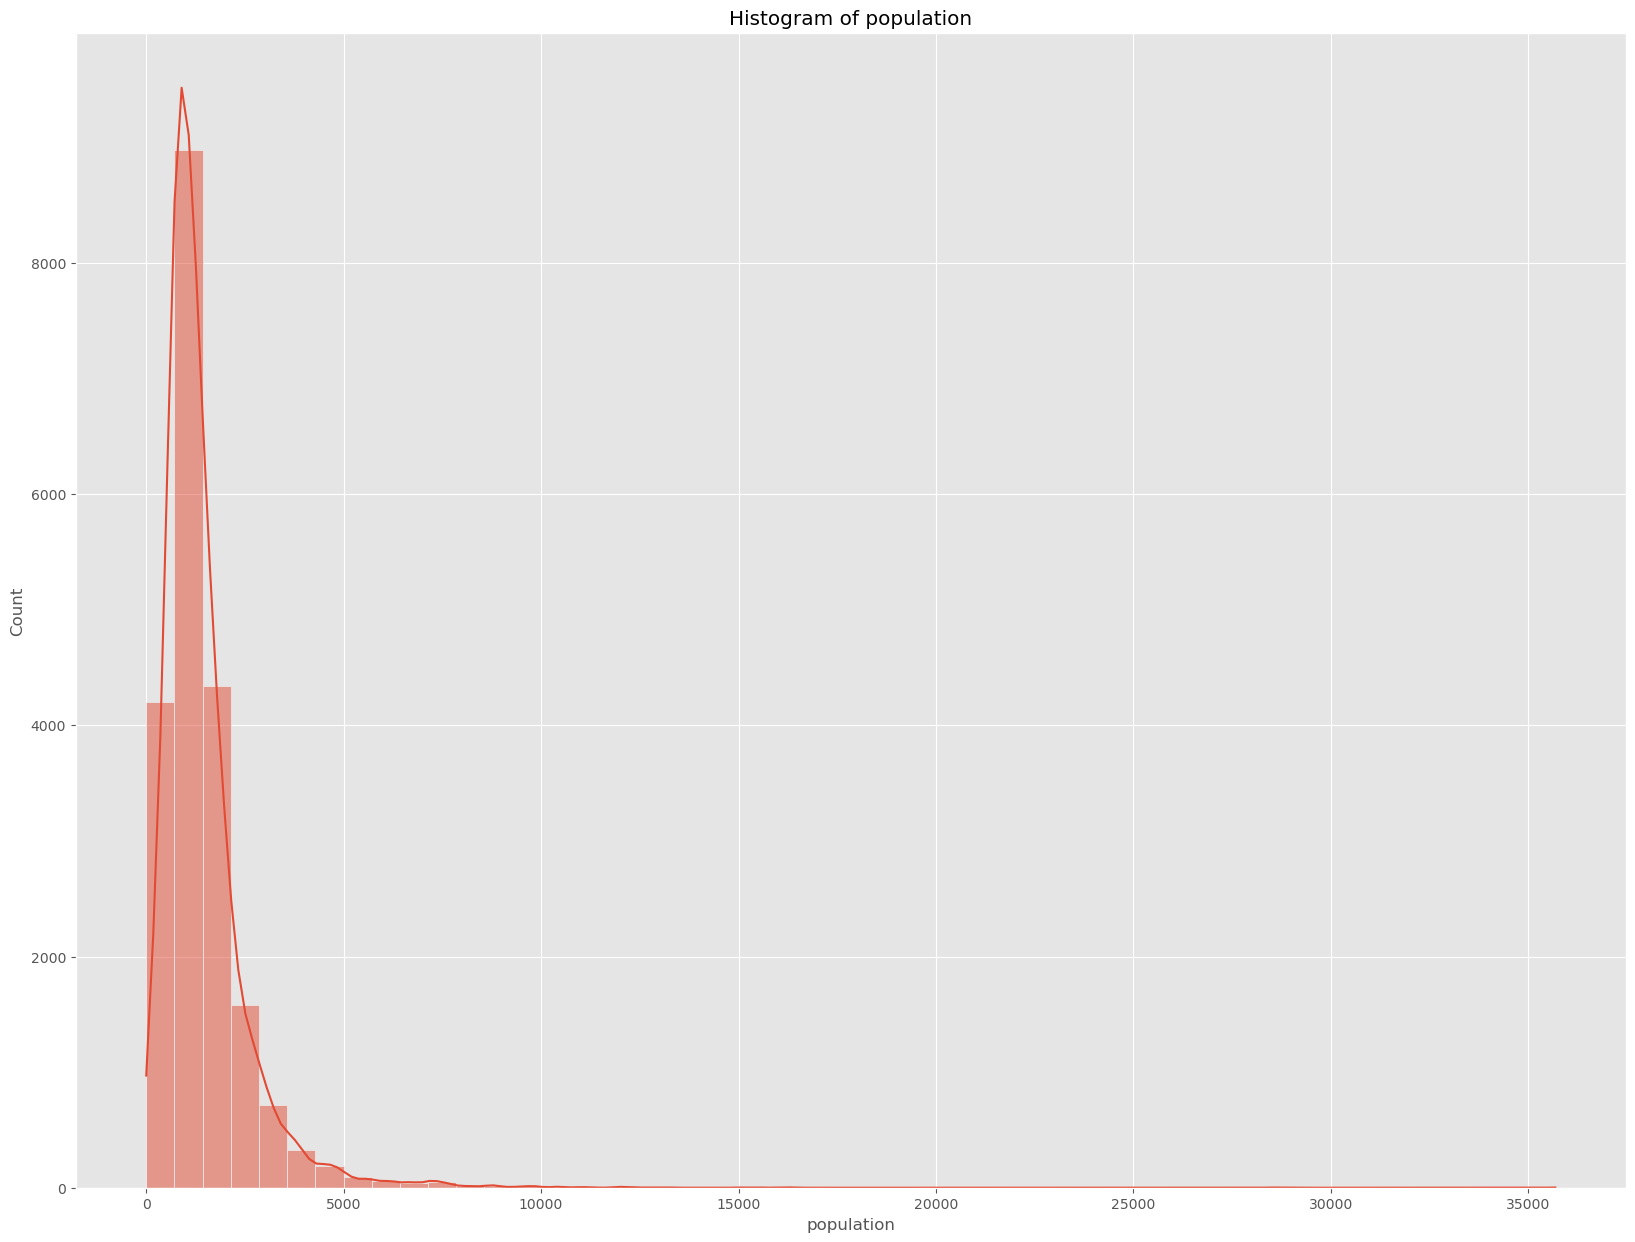

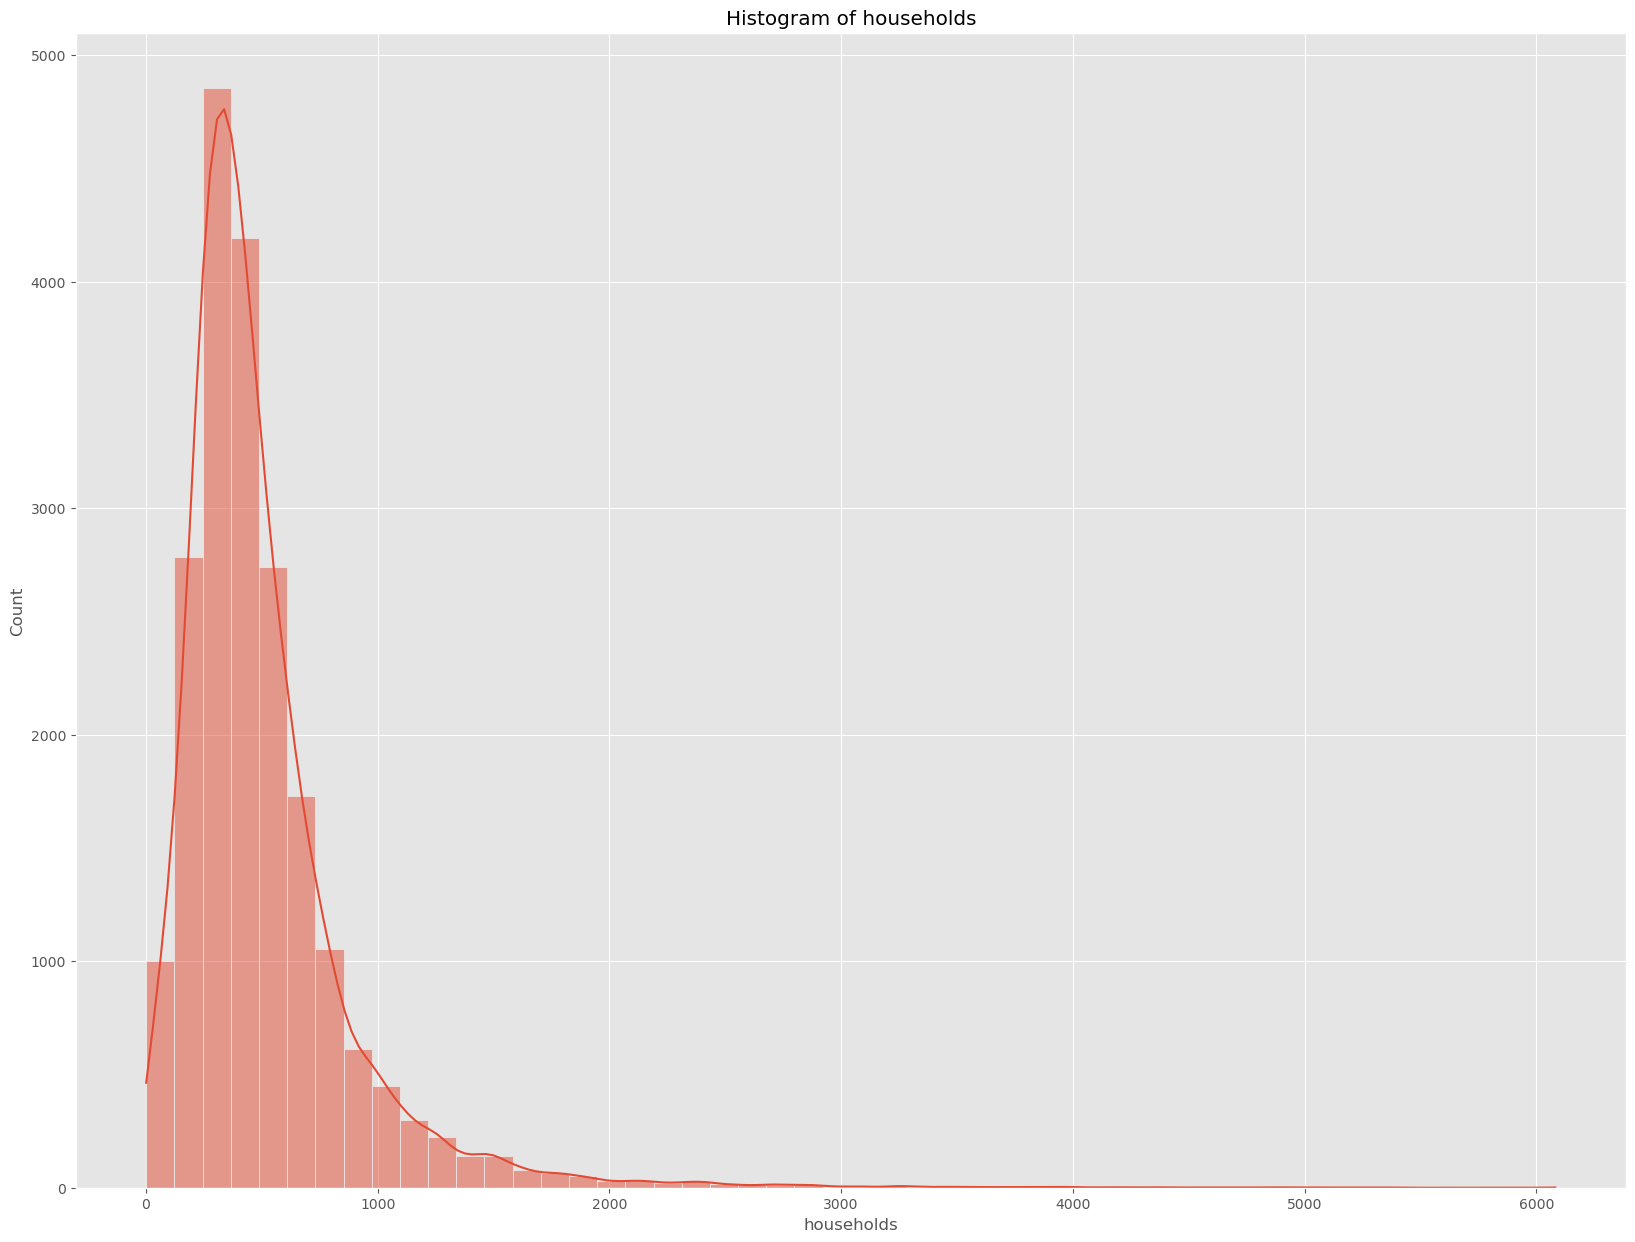

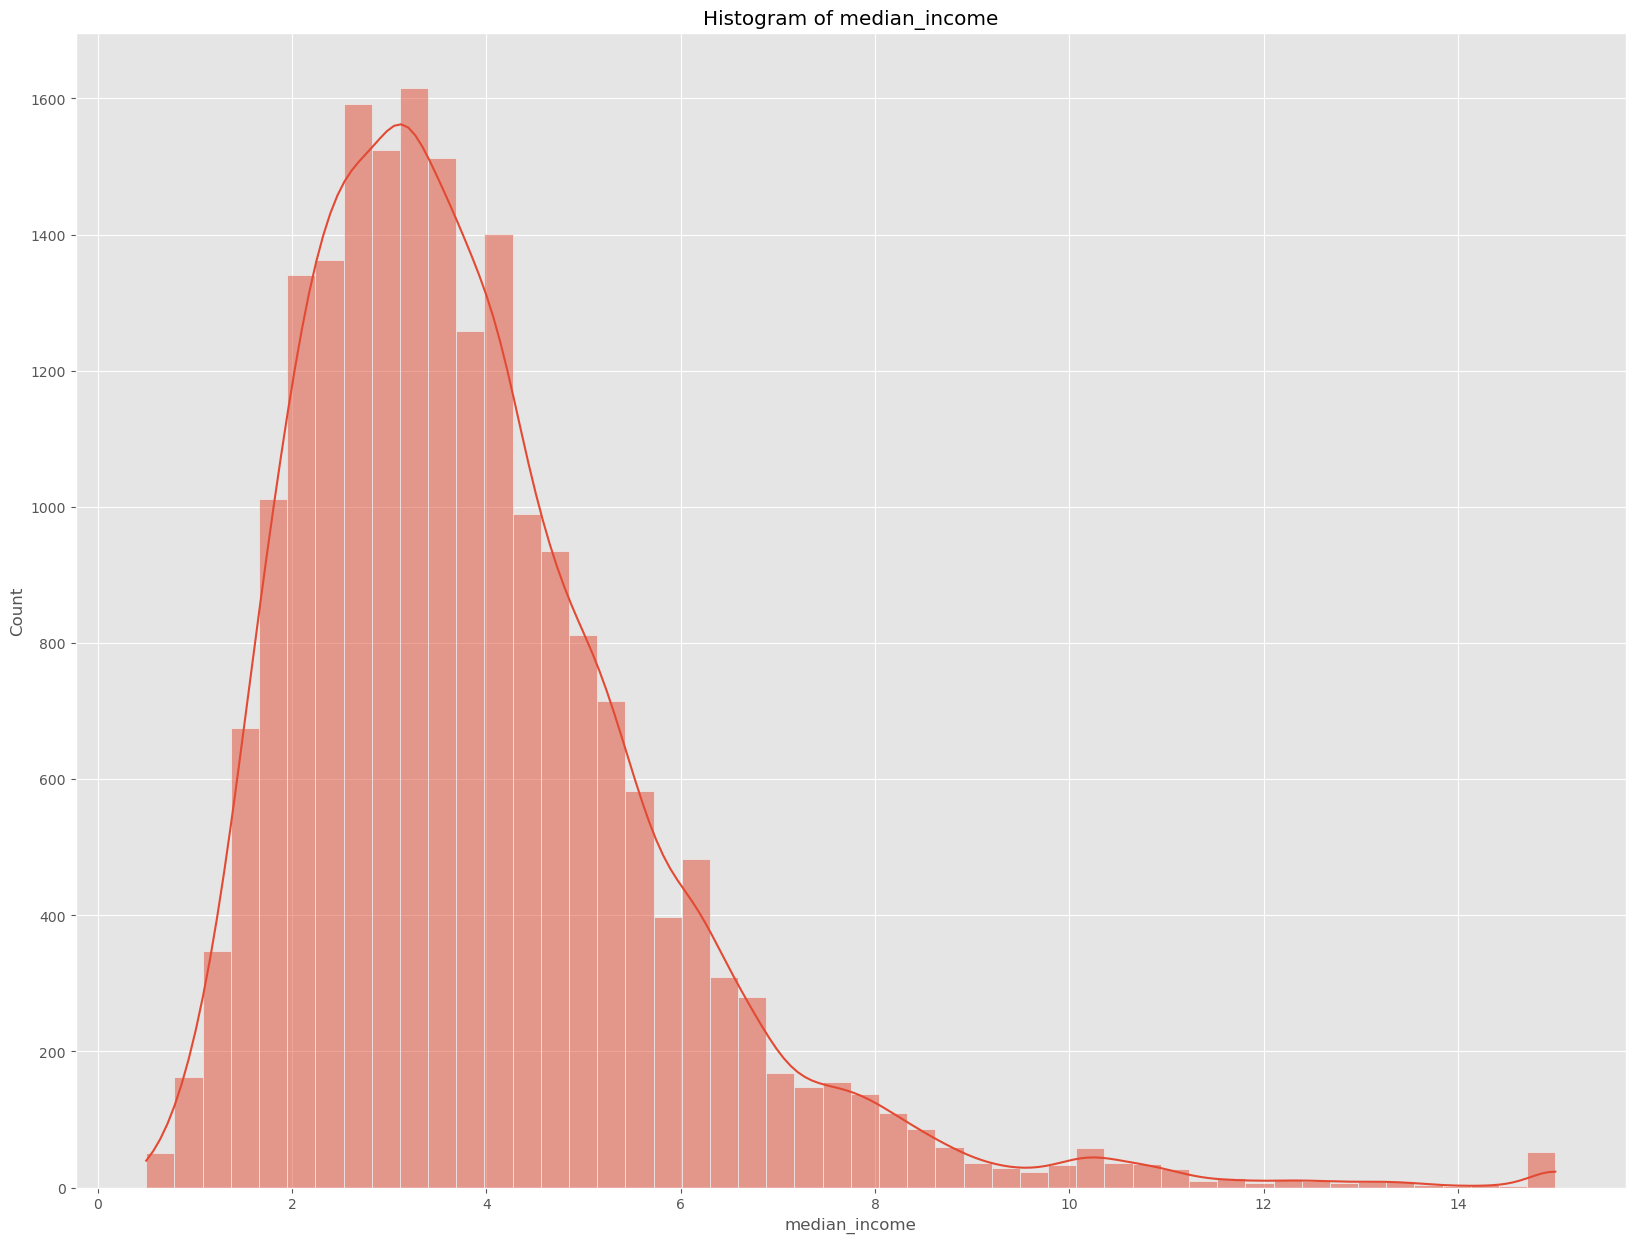

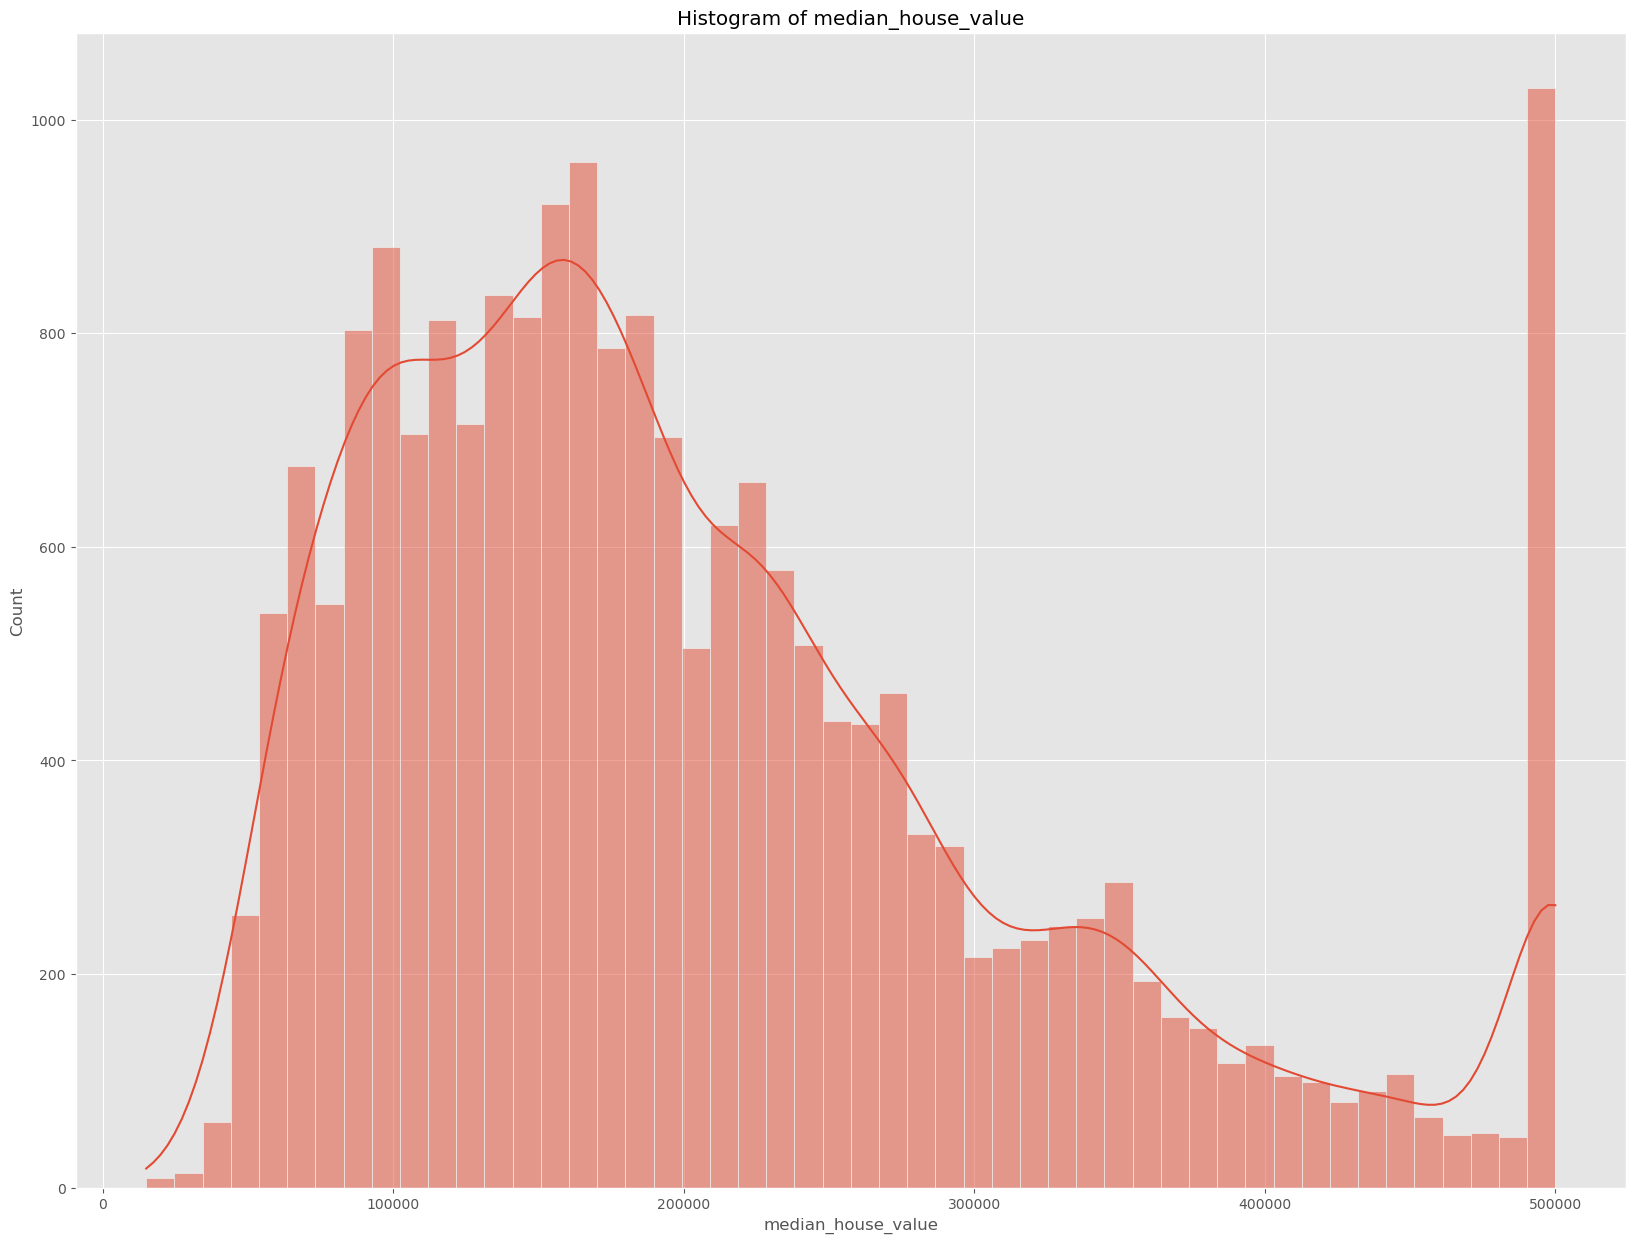

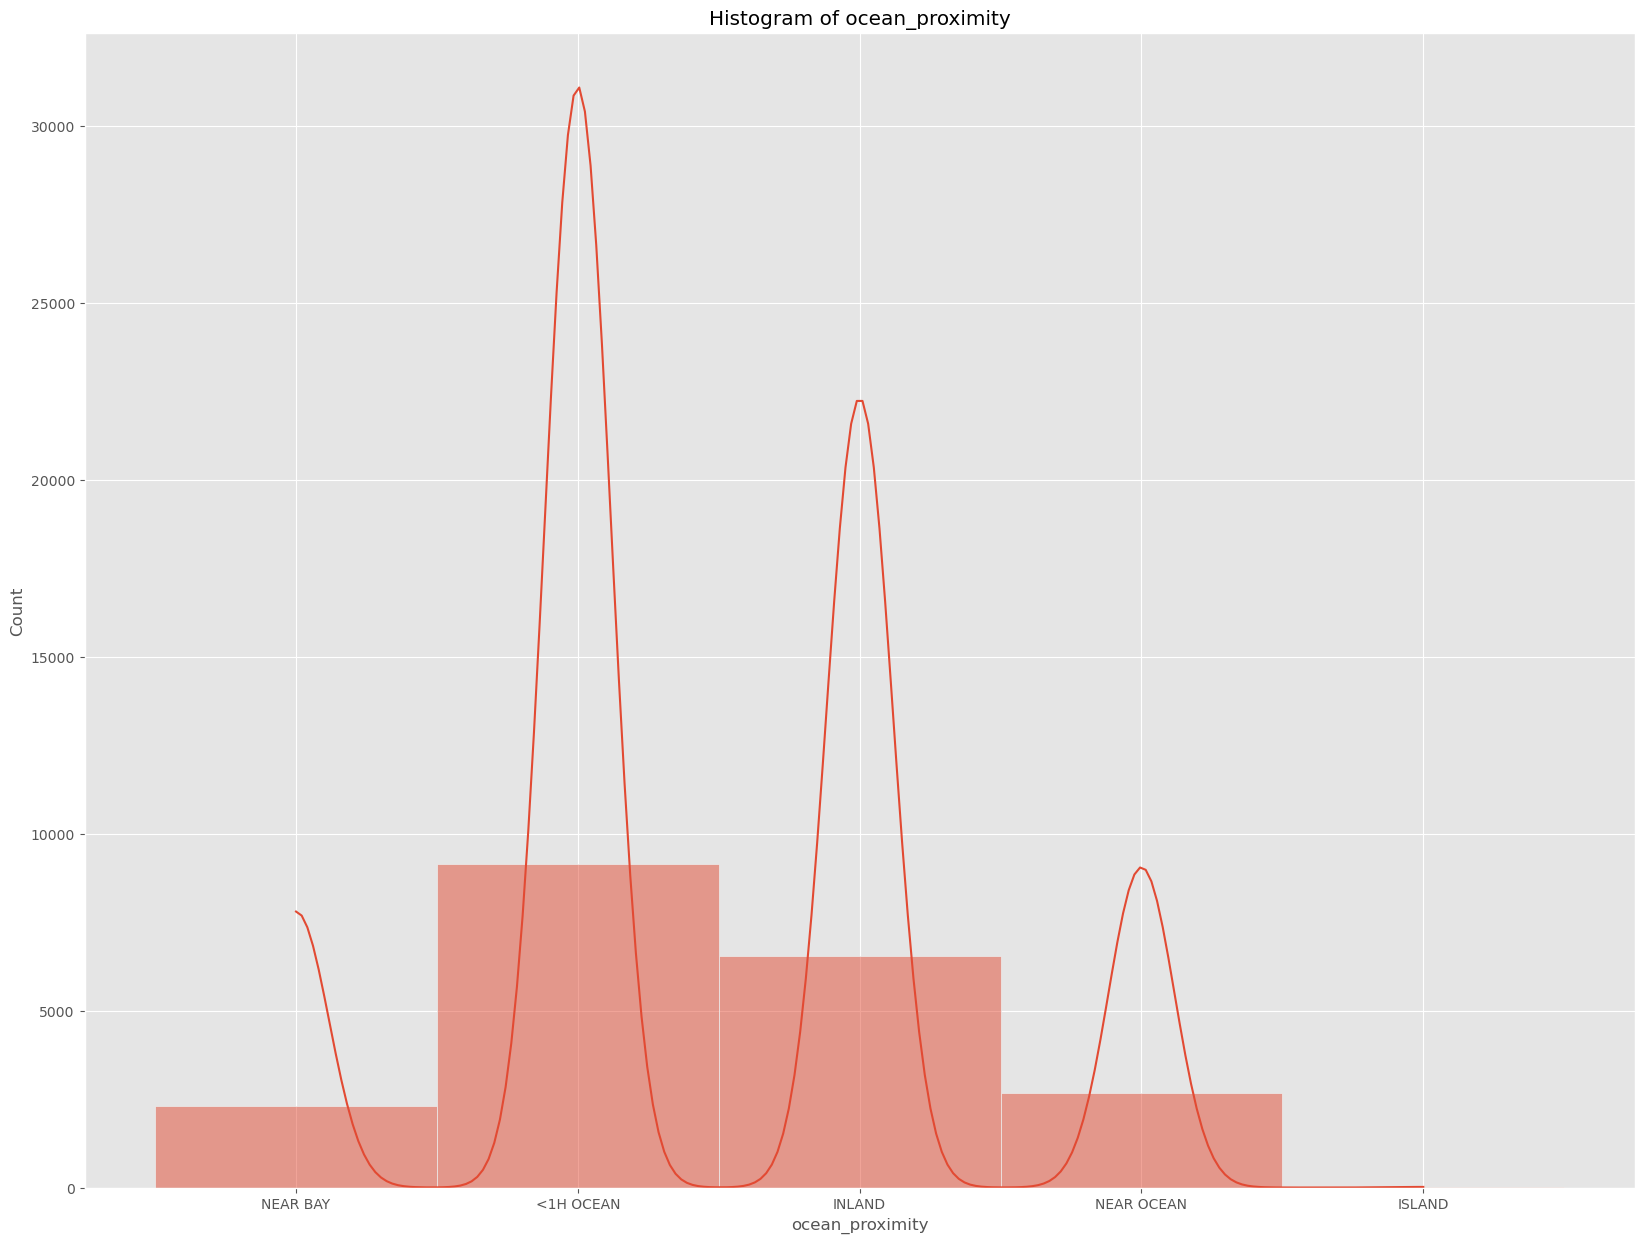

In [117]:
# Visualising the histograms for the columns
for column in housing_data.columns:
    data_visualiser.plot_histogram(column)

#### Visualising the Geographical Data 
Creating a scatterplot of all districts to visualise the data

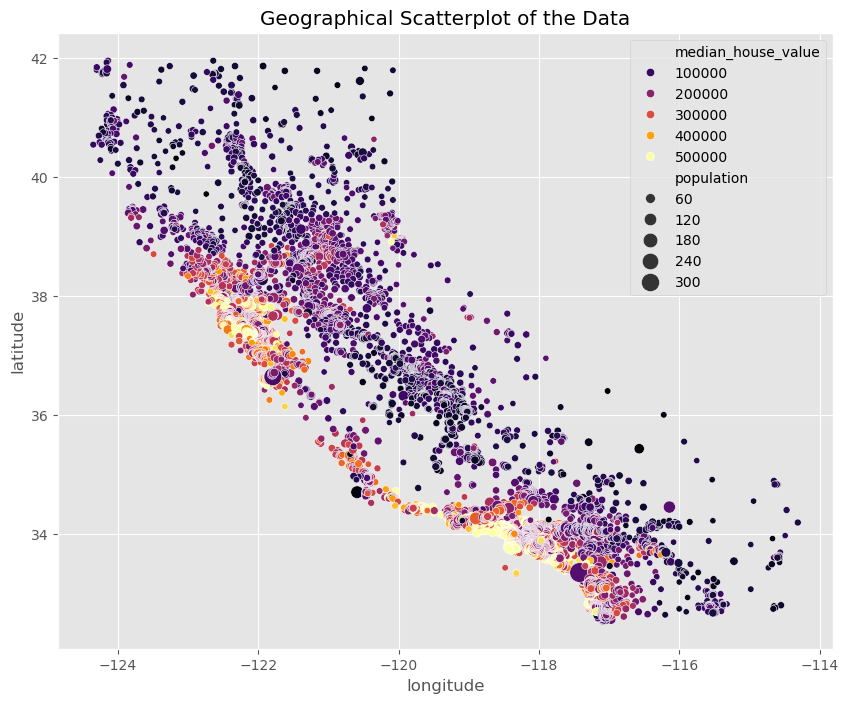

In [118]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x = "longitude", 
    y = "latitude", 
    alpha = 1, 
    size = housing_data["population"] / 100, 
    hue="median_house_value", 
    sizes=(20, 200),
    palette="inferno", 
    data = housing_data)
plt.title('Geographical Scatterplot of the Data')
plt.legend()
plt.show()

It's easy to see the high density area. 
The housing prices are vey much related to the location and to the population density. 

#### Handling Text and Categorical Attributes

Performing Encoding to the categorical Attribute i.e 'ocean_proximity'

In [129]:
# Creating an instance of the ordinal encoder
ordinal_encoder = OrdinalEncoder()
# Defining the categoriccal data
housing_cat = housing_data[['ocean_proximity']]
# housing_cat.tail(10)
# Converting the categories from text to numbers 
encoded_housing_cat = ordinal_encoder.fit_transform(housing_cat)
# Displaying some of the array to verify the encoding
encoded_housing_cat[:-10]

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [130]:
# Display the list of categories 
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One-Hot Encoding

In [133]:
# Creating one binary attribute: one attribute equal to 1 when the category is '<1H OCEAN' (and 0 otherwise) 
# another attribute equal to 1 when the category is 'INLAND (and 0 otherwise)
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [134]:
# Converting the sparse matrix to a NumPy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [135]:
# Confirming the categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]